# Dataset

We get data from url: https://www.kaggle.com/aaron7sun/stocknews

This dataset consists with 3 csv files.
Combined_News_DJIA.csv and RedditNews.csv contains the top headline
news categorized by date
DJIA_table.csv contains the Dow Jones Industrial Average Index containing
Opening price, High price, Low price, Closing price, Volume etc.

# Words related with Crisis

In [3]:
# basic text pre-processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import re
from collections import defaultdict, Counter

# core modules
from pandas import DataFrame, concat, options
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# visualization
from wordcloud import WordCloud

In [4]:
import pandas as pd
data = pd.read_csv('Combined_News_DJIA.csv').reset_index().fillna(' ')

In [5]:
lmb_f = [lambda x: re.sub("""^b("|')""",'', str(x)),  
         lambda x: str(x).lower(),
         lambda x: str(x).replace("'",''),
         lambda x: word_tokenize(str(x)),
         lambda x: ' '.join(x)
        ]

In [6]:
def parse(data):
    lambdas = lmb_f[0:4]
    li = []
    for col in range(1, 26):
        s = data.loc[:,'Top' + str(col)]
        for a in lambdas:
            s = s.apply(a)
        li.append(s)
    return li

In [7]:
data = concat([data.drop(data.columns[2:], axis=1), DataFrame(parse(data)).transpose()], axis=1)

In [8]:
data.head()

,index,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,0,2008-08-08,"[georgia, downs, two, russian, warplanes, as, ...","[breaking, :, musharraf, to, be, impeached, .]","[russia, today, :, columns, of, troops, roll, ...","[russian, tanks, are, moving, towards, the, ca...","[afghan, children, raped, with, impunity, ,, u...","[150, russian, tanks, have, entered, south, os...","[breaking, :, georgia, invades, south, ossetia...","[the, enemy, combatent, trials, are, nothing, ...",...,"[georgia, invades, south, ossetia, -, if, russ...","[al-qaeda, faces, islamist, backlash]","[condoleezza, rice, :, ``, the, us, would, not...","[this, is, a, busy, day, :, the, european, uni...","[georgia, will, withdraw, 1,000, soldiers, fro...","[why, the, pentagon, thinks, attacking, iran, ...","[caucasus, in, crisis, :, georgia, invades, so...","[indian, shoe, manufactory, -, and, again, in,...","[visitors, suffering, from, mental, illnesses,...","[no, help, for, mexicos, kidnapping, surge, '']"
1,1,2008-08-11,"[why, wont, america, and, nato, help, us, ?, i...","[bush, puts, foot, down, on, georgian, conflict]","[jewish, georgian, minister, :, thanks, to, is...","[georgian, army, flees, in, disarray, as, russ...","[olympic, opening, ceremony, fireworks, faked,...","[what, were, the, mossad, with, fraudulent, ne...","[russia, angered, by, israeli, military, sale,...","[an, american, citizen, living, in, s.ossetia,...",...,"[israel, and, the, us, behind, the, georgian, ...","[``, do, not, believe, tv, ,, neither, russian...","[riots, are, still, going, on, in, montreal, (...","[china, to, overtake, us, as, largest, manufac...","[war, in, south, ossetia, [, pics, ]]","[israeli, physicians, group, condemns, state, ...","[russia, has, just, beaten, the, united, state...","[perhaps, *the*, question, about, the, georgia...","[russia, is, so, much, better, at, war]","[so, this, is, what, its, come, to, :, trading..."
2,2,2008-08-12,"[remember, that, adorable, 9-year-old, who, sa...","[russia, ends, georgia, operation, '']","[``, if, we, had, no, sexual, harassment, we, ...","[al-qaeda, is, losing, support, in, iraq, beca...","[ceasefire, in, georgia, :, putin, outmaneuver...","[why, microsoft, and, intel, tried, to, kill, ...","[stratfor, :, the, russo-georgian, war, and, t...","[im, trying, to, get, a, sense, of, this, whol...",...,"[u.s., troops, still, in, georgia, (, did, you...","[why, russias, response, to, georgia, was, right]","[gorbachev, accuses, u.s., of, making, a, ``, ...","[russia, ,, georgia, ,, and, nato, :, cold, wa...","[remember, that, adorable, 62-year-old, who, l...","[war, in, georgia, :, the, israeli, connection]","[all, signs, point, to, the, us, encouraging, ...","[christopher, king, argues, that, the, us, and...","[america, :, the, new, mexico, ?]","[bbc, news, |, asia-pacific, |, extinction, by..."
3,3,2008-08-13,"[u.s., refuses, israel, weapons, to, attack, i...","[when, the, president, ordered, to, attack, ts...","[israel, clears, troops, who, killed, reuters,...","[britain\s, policy, of, being, tough, on, drug...","[body, of, 14, year, old, found, in, trunk, ;,...","[china, has, moved, 10, *million*, quake, surv...","[bush, announces, operation, get, all, up, in,...","[russian, forces, sink, georgian, ships]",...,"[elephants, extinct, by, 2020, ?]","[us, humanitarian, missions, soon, in, georgia...","[georgias, ddos, came, from, us, sources, '']","[russian, convoy, heads, into, georgia, ,, vio...","[israeli, defence, minister, :, us, against, s...","[gorbachev, :, we, had, no, choice]","[witness, :, russian, forces, head, towards, t...","[quarter, of, russians, blame, u.s., for, conf...","[georgian, president, says, us, military, will...","[2006, :, nobel, laureate, aleksander, solzhen..."
4,4,2008-08-14,"[all, the, experts, admit, that, we, should, l...","[war, in, south, osetia, -, 89, pictures, made...","[swedish, wrestler, ara, abrahamian, throws, a...","[rus

In [9]:
crisis_marker = 'crisis'

list_of_crisis = defaultdict(lambda: 0.0)

for ind in range(data.shape[0]):
    list_of_articles = list(data.loc[ind])[2:]
    for i in list_of_articles:
        if crisis_marker in i:
            try:
                word = pos_tag([i[i.index(crisis_marker)-1]])[0]
                if word[1]=='JJ':
                    list_of_crisis[word[0]] += 1.0
            except Exception as e:
                pass


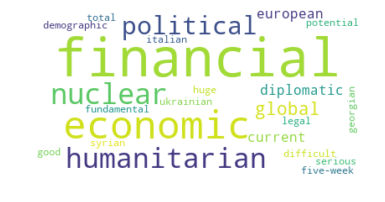

In [10]:
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(dict(list_of_crisis))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()